In [15]:
# Import all libraries and dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd

In [17]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# Create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [21]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_day = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
year_ago = dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores, order by date
data_prec = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>year_ago).\
    order_by(Measurement.date).all()
data_prec

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

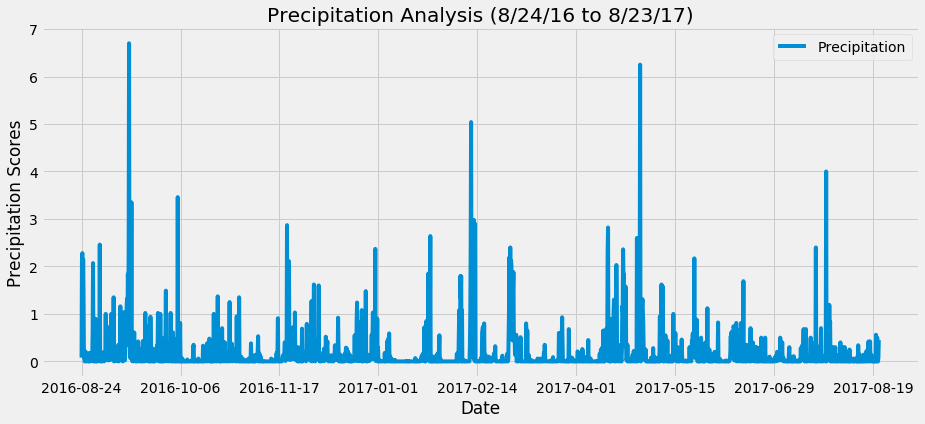

In [26]:
# Save the query results as a Pandas DataFrame and set the index to the date column
data_prec_df = pd.DataFrame(data_prec, columns=["Date", "Precipitation"]).dropna()
data_prec_df = data_prec_df.set_index("Date")

# Use Pandas Plotting with Matplotlib to plot the data
data_prec_df.plot(figsize=(14,6))
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.ylabel("Precipitation Scores")
currentfig = plt.gcf()
plt.show()
currentfig.savefig("Images/precipitation.png", bbox_inches="tight")

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_prec_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [29]:
# Design a query to show how many stations are available in this dataset?
station_number = session.query(Measurement.station).group_by(Measurement.station).count()
print(f"There are {station_number} stations available in this dataset.")

There are 9 stations available in this dataset.


In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station_list = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_station = active_station_list[0][0]
active_station

'USC00519281'

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
id_temp = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station==active_station).all()[0]
id_temp
print(f"For station {active_station}, the lowest temperature is {id_temp[1]}, highest temperature is {id_temp[0]}, and the average temperature is {id_temp[2]}.")

For station USC00519281, the lowest temperature is 54.0, highest temperature is 85.0, and the average temperature is 71.66378066378067.


In [32]:
# Choose the station with the highest number of temperature observations.
highest_temp = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
highest_temp_station = highest_temp[0][0]

# Query the last 12 months of temperature observation data for this station. 
highest_temp_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station==highest_temp_station).\
    filter(Measurement.date>=year_ago).order_by(Measurement.date).all()
highest_temp_data

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

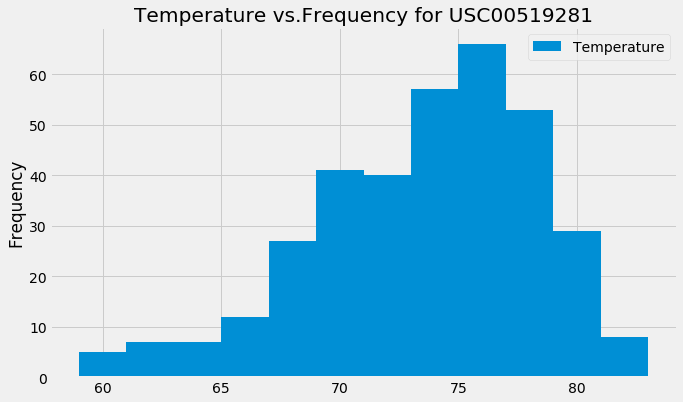

In [34]:
# Save the results as DataFrame.
highest_temp_data_df = pd.DataFrame(highest_temp_data, columns = ["Station", "Date", "Temperature"])
highest_temp_data_df = highest_temp_data_df.set_index("Station")

# Plot the results as a histogram.
highest_temp_data_df.plot(kind = 'hist', bins = 12, figsize = (10,6))
plt.title(f"Temperature vs.Frequency for {active_station}")
currentfig = plt.gcf()
plt.show()
currentfig.savefig("Images/station-histogram.png", bbox_inches="tight")

## Bonus Challenge Assignment

### Temperature Analysis I

In [36]:
# Identify the average temperature in June at all stations across all available years in the dataset.
june_data_avg = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == "06").all()
june_data = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()
june_data_avg

[(74.94411764705882)]

In [37]:
# Do the same for December temperature.
dec_data_avg = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == "12").all()
dec_data = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()
dec_data_avg

[(71.04152933421226)]

In [38]:
# Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
from scipy import stats
stats.ttest_ind(june_data, dec_data)

# Since the pvalue is a very small; less than 0.05, indicating that the difference between the two means is statistically significant.

Ttest_indResult(statistic=array([31.60372399]), pvalue=array([3.9025129e-191]))

#### Will you use a paired t-test, or an unpaired t-test? Why?
##### We are using the unpaired T-test in this case, since average temperature in June and average temperature in December are comparing the means of two different groups.

### Temperature Analysis II

In [39]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [52]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
arrival_date = dt.date(2018,1,1)-dt.timedelta(days=365)
depart_date = dt.date(2018,1,20)-dt.timedelta(days=365)
previous_temp = calc_temps(arrival_date, depart_date)[0]
print(f"The minimum temperature is {previous_temp[0]}, the average temperature is {previous_temp[1]}, and the maximum temperature is {previous_temp[2]}.")

The minimum temperature is 60.0, the average temperature is 69.49180327868852, and the maximum temperature is 81.0.


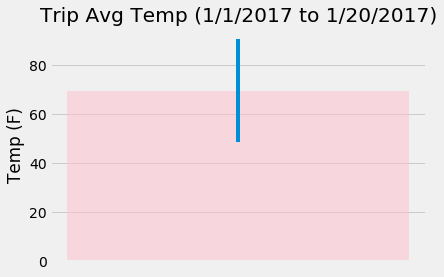

In [62]:
# Plot the results from your previous query as a bar chart. 
tmax = previous_temp[2]
tmin = previous_temp[0]
tavg = previous_temp[1]
plt.bar(1, tavg, alpha = 0.5, color = "pink")

# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.errorbar(1, tavg, yerr = tmax-tmin)

# Use "Trip Avg Temp" as your Title
plt.title("Trip Avg Temp (1/1/2017 to 1/20/2017)")
plt.ylabel("Temp (F)")
plt.xticks([])
currentfig = plt.gcf()
plt.show()
currentfig.savefig("Images/temperature.png", bbox_inches="tight")

In [55]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rainfall = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, 
                                func.sum(Measurement.prcp)).filter(Measurement.date>=arrival_date).\
    filter(Measurement.date<=depart_date).filter(Measurement.station==Station.station).\
    order_by(func.sum(Measurement.prcp).desc()).group_by(Measurement.station).all()
total_rainfall_df = pd.DataFrame(total_rainfall, columns = ["Station", "Name", "Latitude", "Longitude", 
                                                            "Elevation", "Total Precipitation"])
total_rainfall_df

,Station,Name,Latitude,Longitude,Elevation,Total Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.71
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.63
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.61
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.35
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.23
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.00
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00


In [56]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [57]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
start_date = dt.date(2018,1,1)
end_date = dt.date(2018,1,20)

# Use the start and end date to create a range of dates
dates=[]
normals=[]
begin_date=start_date

# Loop through the list of %m-%d strings and calculate the normals for each date
while begin_date <= end_date:
    
    # Stip off the year and save a list of %m-%d strings
    dates.append(begin_date.strftime("%m-%d"))
    normals.append(daily_normals(begin_date.strftime("%m-%d"))[0])
    begin_date=begin_date+dt.timedelta(days=1)

normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0),
 (57.0, 67.16071428571429, 75.0),
 (58.0, 67.9298245614035, 78.0),
 (62.0, 69.74137931034483, 77.0),
 (57.0, 67.3103448275862, 78.0),
 (57.0, 67.4074074074074, 81.0),
 (57.0, 67.25454545454545, 77.0),
 (58.0, 69.52631578947368, 77.0),
 (56.0, 69.31372549019608, 78.0),
 (54.0, 68.62962962962963, 80.0),
 (61.0, 69.07407407407408, 76.0),
 (57.0, 68.63157894736842, 77.0),
 (60.0, 68.26315789473684, 78.0),
 (61.0, 68.86666666666666, 78.0)]

In [58]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_df = pd.DataFrame(normals, columns = ["Min Temp", "Avg Temp", "Max Temp"])
trip_df["Date"] = dates 
trip_df = trip_df.set_index("Date")
trip_df

,Min Temp,Avg Temp,Max Temp
Date,,,
01-01,62.0,69.153846,77.0
01-02,60.0,69.396226,77.0
01-03,62.0,68.909091,77.0
01-04,58.0,70.000000,76.0
01-05,56.0,67.964286,76.0
01-06,61.0,68.964912,76.0
01-07,57.0,68.543860,76.0
01-08,57.0,67.160714,75.0
01-09,58.0,67.929825,78.0


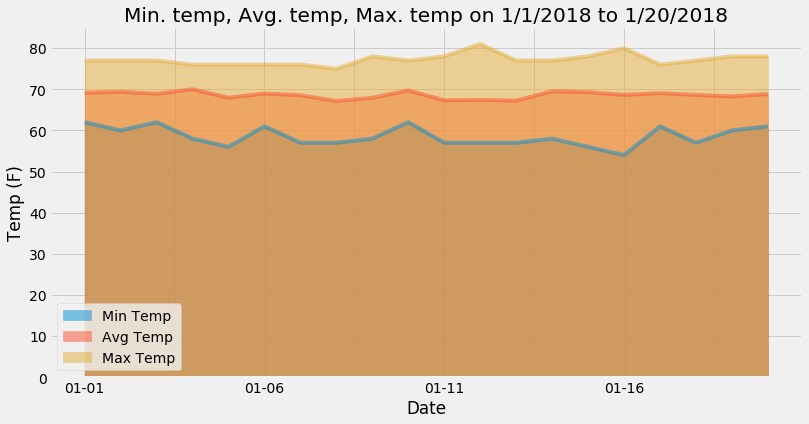

In [61]:
# Plot the daily normals as an area plot with `stacked=False`
trip_df.plot(kind="area", stacked=False, alpha=0.5, figsize=(12,6))
plt.title("Min. temp, Avg. temp, Max. temp on 1/1/2018 to 1/20/2018")
plt.ylabel("Temp (F)")
currentfig = plt.gcf()
plt.show()
currentfig.savefig("Images/daily-normals.png", bbox_inches="tight")